In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
bike = pd.read_csv(r'F:\teaching\数据科学基础\data\数据\bike.csv')
bike.head(20)

datetime  season  holiday  workingday  weather   temp   atemp  \
0   2011-01-01 00:00:00       1        0           0        1   9.84  14.395   
1   2011-01-01 01:00:00       1        0           0        1   9.02  13.635   
2   2011-01-01 02:00:00       1        0           0        1   9.02  13.635   
3   2011-01-01 03:00:00       1        0           0        1   9.84  14.395   
4   2011-01-01 04:00:00       1        0           0        1   9.84  14.395   
5   2011-01-01 05:00:00       1        0           0        2   9.84  12.880   
6   2011-01-01 06:00:00       1        0           0        1   9.02  13.635   
7   2011-01-01 07:00:00       1        0           0        1   8.20  12.880   
8   2011-01-01 08:00:00       1        0           0        1   9.84  14.395   
9   2011-01-01 09:00:00       1        0           0        1  13.12  17.425   
10  2011-01-01 10:00:00       1        0           0        1  15.58  19.695   
11  2011-01-01 11:00:00       1        0           0        1  14.76  16.665   
12  2011-01-01 12:00:00       1        0           0        1  17.22  21.210   
13  2011-01-01 13:00:00       1        0           0        2  18.86  22.725   
14  2011-01-01 14:00:00       1        0           0        2  18.86  22.725   
15  2011-01-01 15:00:00       1        0           0        2  18.04  21.970   
16  2011-01-01 16:00:00       1        0           0        2  17.22  21.210   
17  2011-01-01 17:00:00       1        0           0        2  18.04  21.970   
18  2011-01-01 18:00:00       1        0           0        3  17.22  21.210   
19  2011-01-01 19:00:00       1        0           0        3  17.22  21.210   

    humidity  windspeed  casual  registered  count  
0         81     0.0000       3          13     16  
1         80     0.0000       8          32     40  
2         80     0.0000       5          27     32  
3         75     0.0000       3          10     13  
4         75     0.0000       0           1      1  
5         75     6.0032       0           1      1  
6         80     0.0000       2           0      2  
7         86     0.0000       1           2      3  
8         75     0.0000       1           7      8  
9         76     0.0000       8           6     14  
10        76    16.9979      12          24     36  
11        81    19.0012      26          30     56  
12        77    19.0012      29          55     84  
13        72    19.9995      47          47     94  
14        72    19.0012      35          71    106  
15        77    19.9995      40          70    110  
16        82    19.9995      41          52     93  
17        82    19.0012      15          52     67  
18        88    16.9979       9          26     35  
19        88    16.9979       6          31     37

In [3]:
bike.shape

(10886, 12)

### 定义问题

时间段与自行车租赁的关系

### 数据清洗

In [6]:
bike.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
bike.dtypes  #datetime字段不是时间类型

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
#转换数据类型
bike['datetime'] = pd.to_datetime(bike['datetime'])
bike.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [7]:
#将datetime字段设置成索引，转换成时间序列数据。
bike = bike.set_index('datetime')
bike.head()

season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  count  
datetime                                                             
2011-01-01 00:00:00        81        0.0       3          13     16  
2011-01-01 01:00:00        80        0.0       8          32     40  
2011-01-01 02:00:00        80        0.0       5          27     32  
2011-01-01 03:00:00        75        0.0       3          10     13  
2011-01-01 04:00:00        75        0.0       0           1      1

In [8]:
bike.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-19 14:00:00', '2012-12-19 15:00:00',
               '2012-12-19 16:00:00', '2012-12-19 17:00:00',
               '2012-12-19 18:00:00', '2012-12-19 19:00:00',
               '2012-12-19 20:00:00', '2012-12-19 21:00:00',
               '2012-12-19 22:00:00', '2012-12-19 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=10886, freq=None)

In [9]:
#时间序列的时间范围
bike.tail()

season  holiday  workingday  weather   temp   atemp  \
datetime                                                                   
2012-12-19 19:00:00       4        0           1        1  15.58  19.695   
2012-12-19 20:00:00       4        0           1        1  14.76  17.425   
2012-12-19 21:00:00       4        0           1        1  13.94  15.910   
2012-12-19 22:00:00       4        0           1        1  13.94  17.425   
2012-12-19 23:00:00       4        0           1        1  13.12  16.665   

                     humidity  windspeed  casual  registered  count  
datetime                                                             
2012-12-19 19:00:00        50    26.0027       7         329    336  
2012-12-19 20:00:00        57    15.0013      10         231    241  
2012-12-19 21:00:00        61    15.0013       4         164    168  
2012-12-19 22:00:00        61     6.0032      12         117    129  
2012-12-19 23:00:00        66     8.9981       4          84     88

### 数据探索

In [11]:
#两个年份的总数
y_bike = bike.groupby(lambda x: x.year).mean()  #groupby的参数可以是字段series，或者索引。.agg('mean')
y_bike['count']

2011    144.223349
2012    238.560944
Name: count, dtype: float64

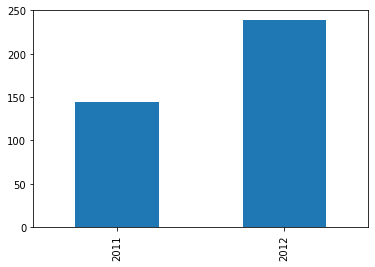

In [23]:
y_bike['count'].plot(kind='bar')

In [26]:
#降采样，聚合到月，索引类型为时期
m_bike = bike.resample('M', kind='period').mean()  #bike.resample?
m_bike.head()

season   holiday  workingday   weather       temp      atemp  \
datetime                                                                 
2011-01      1.0  0.055684    0.612529  1.440835   8.633782  10.767981   
2011-02      1.0  0.000000    0.733184  1.378924  11.331076  13.999922   
2011-03      1.0  0.000000    0.735426  1.466368  14.063184  16.895594   
2011-04      2.0  0.052747    0.630769  1.619780  17.776879  21.239835   
2011-05      2.0  0.000000    0.736842  1.528509  21.528596  25.455143   

           humidity  windspeed     casual  registered       count  
datetime                                                           
2011-01   56.308585  13.749830   4.658933   49.986079   54.645012  
2011-02   53.580717  15.509298   8.466368   65.174888   73.641256  
2011-03   55.923767  16.033866  17.735426   69.114350   86.849776  
2011-04   66.285714  15.844234  26.876923   84.149451  111.026374  
2011-05   71.421053  12.355358  34.791667  140.017544  174.809211

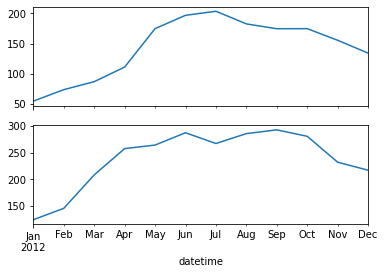

In [35]:
fig, axes = plt.subplots(2, 1)    #两行一列
m_bike['2011']['count'].plot(ax=axes[0],sharex=True)  #共享X轴
m_bike['2012']['count'].plot(ax=axes[1])

In [36]:
#分析每天和没小时的租赁情况
#抽取出day和hour数据，存为字段
bike['day'] = bike.index.day
bike['hour'] = bike.index.hour
bike.head()

season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  count  day  hour  
datetime                                                                        
2011-01-01 00:00:00        81        0.0       3          13     16    1     0  
2011-01-01 01:00:00        80        0.0       8          32     40    1     1  
2011-01-01 02:00:00        80        0.0       5          27     32    1     2  
2011-01-01 03:00:00        75        0.0       3          10     13    1     3  
2011-01-01 04:00:00        75        0.0       0           1      1    1     4

In [37]:
d_bike = bike.groupby('day')['count'].mean()
d_bike  #数据集只有前19天

day
1     180.333913
2     183.910995
3     194.696335
4     195.705575
5     189.765217
6     189.860140
7     183.773519
8     179.041812
9     187.897391
10    195.183566
11    195.679577
12    190.675393
13    194.160279
14    195.829268
15    201.527875
16    191.353659
17    205.660870
18    192.605684
19    192.311847
Name: count, dtype: float64

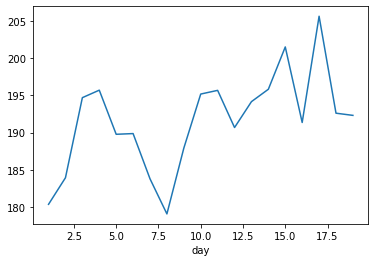

In [38]:
d_bike.plot()

In [39]:
h_bike = bike.groupby('hour')['count'].mean()
h_bike

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: count, dtype: float64

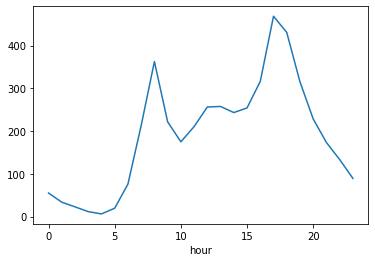

In [40]:
h_bike.plot()

In [51]:
g_bike

workingday  hour
0           0        94.489655
            1        71.910345
            2        53.748252
            3        25.534722
            4         8.544828
            5         9.373239
            6        19.993103
            7        47.268966
            8       112.255172
            9       177.924138
            10      263.806897
            11      325.386207
            12      379.110345
            13      387.820690
            14      378.731034
            15      373.703448
            16      367.648276
            17      339.124138
            18      292.248276
            19      242.344828
            20      183.806897
            21      148.737931
            22      123.351724
            23       90.606897
1           0        36.732258
            1        16.003236
            2         8.436066
            3         4.892734
            4         5.363636
            5        24.529032
            6       102.577419
            7       29

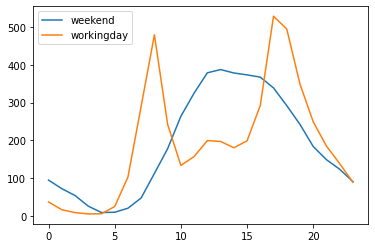

In [54]:
#是否工作日中不同时间段的租赁情况对比
g_bike = bike.groupby(['workingday','hour'])['count'].mean()
plt.plot(g_bike[0].index,g_bike[0],label='weekend')
plt.plot(g_bike[1].index,g_bike[1],label='workingday')
plt.legend()
#g_bike[1].plot()
#g_bike[0].plot()

In [41]:
#是否工作日对租赁情况的影响
work_bike = bike.groupby('workingday')['count'].mean()
work_bike

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

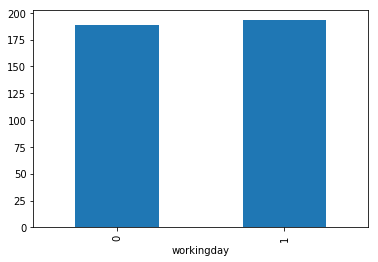

In [97]:
work_bike.plot(kind='bar')

In [44]:
#天气对租赁情况的影响
weather_bike = bike.groupby('weather')['count'].mean()
weather_bike

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

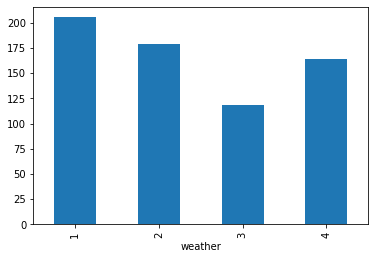

In [43]:
weather_bike.plot(kind='bar')